# Simulating multiple beam interference in an umbrella geomtry
This notebook does step-by-step calculation of multiple beam interference where N plane waves interfere on a plane in such a way that all the plane waves are tilted at same angle with respect to interference plane and the plane waves are distributed symmetrically along the azimuthal orientation.

Limitations: Calculations in this notbook doen't take polarization into account. A large angle interference result will not be accurate (but will still be a good representative result)

### Import tools and setup font properties

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import cm #usefule for colormaps management
%matplotlib inline
#set font properties
mpl.rcParams['font.family'] = "sans-serif"
mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.size'] = 20

### User defined parameters 

In [2]:
# Beam parameters i.e. wavelength, no of beams and theta (tilt) 
wvl = 405e-9 #in meters
no_of_beams = 9
theta = 0.2 #tilt angle (degrees) wrt normal to interference plane 
#We need to setup a numerical detector in the interference plane 
#to get the values. Let's set no of pixels and pixel size:
n_px = 512 # number of pixels
px_size = 5e-6 # in meters

### Setup the derived variables from above defined parameters

In [3]:
#setup phi i.e. azimuthal angle of each of the beams
phi = np.zeros(no_of_beams) #initialize phi (degrees)
for i in range(no_of_beams):
    phi[(i)] = 2*np.pi/no_of_beams*i
#setup X and Y mesh for numerical detector
x = np.arange(-np.around(n_px/2),np.around(n_px/2))
y = np.arange(-np.around(n_px/2),np.around(n_px/2))
X,Y = np.meshgrid(x,y) #usual format i.e. x->#col, y->#rows
x_dim = X.shape #size of X matrix (and Y too)

### Beam interference is a sum of individual fields

In [4]:
#initialize a ndarray to hold interference field
E = np.zeros((x_dim[0],x_dim[1]),dtype=complex) 
# calculate interference field
for i in range(no_of_beams):    
    #kz = 2*np.pi/wvl*np.cos(np.deg2rad(theta))
    kx = 2*np.pi/wvl*np.sin(np.deg2rad(theta))*np.cos(phi[i])
    ky = 2*np.pi/wvl*np.sin(np.deg2rad(theta))*np.sin(phi[i])
    phase = (kx*X+ky*Y)*px_size
    E += np.exp(1j*phase) #sum fields across all beams

### Extract magnitude and phase part of the complex interference field and plot

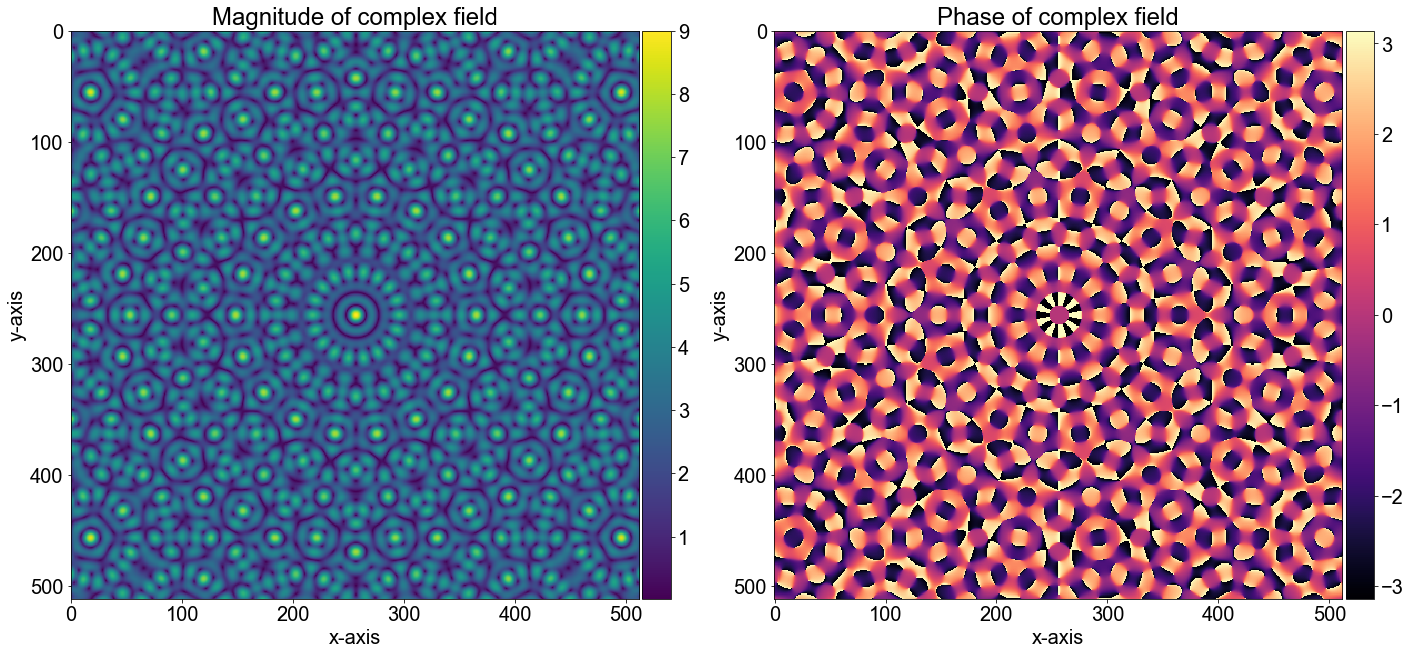

In [5]:
fig = plt.figure(figsize=(20,10)) #setup a blank figure 
ax1 = fig.add_subplot(121)
im1 = plt.imshow(np.abs(E))
#colormap: more options at https://matplotlib.org/users/colormaps.html
im1.set_cmap('viridis') 
ax1.set(xlabel='x-axis', ylabel='y-axis',
       title='Magnitude of complex field')
# create an axes on the right side of ax. The width of cax will be 5%
# of ax and the padding between cax and ax will be fixed at 0.05 inch.
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im1, cax=cax)
#set up 2nd figure axis for phase part of field
ax2 = fig.add_subplot(122)
phase = np.angle(E)
#rounding -pi to +pi
phase = np.isclose(phase,-np.pi)*2*np.pi + phase 
im2 = plt.imshow(phase)
im2.set_cmap('magma')
im2.set_clim(-np.pi,np.pi) #phase varies from -pi to pi
ax2.set(xlabel='x-axis', ylabel='y-axis',
       title='Phase of complex field')
divider = make_axes_locatable(ax2)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im2, cax=cax)
plt.tight_layout()
plt.savefig('InterferenceProfile.png')